In [502]:
import tensorflow as tf
from tqdm import trange
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
learning_rate = 1e-3
training_epochs = 1
batch_size = 66
display_step = 1
n_input = 26
n_classes = 6
n_hidden_1 = 30 # 1st layer number of neurons
n_hidden_2 = 15 # 2nd layer number of neurons

features = pd.read_csv('~/Downloads/dataset/training-x2mod.csv')
labels = pd.read_csv('~/Downloads/dataset/training-y.csv')

labels = labels.values
features = features.values

100%|██████████| 1/1 [00:01<00:00,  1.48s/it]


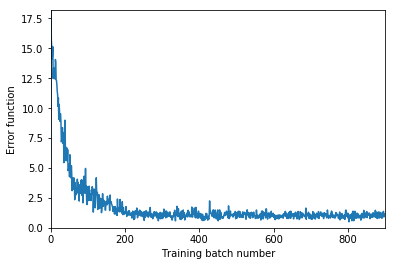

FileNotFoundError: [Errno 2] No such file or directory: '~/Downloads/graderror.png'

<Figure size 432x288 with 0 Axes>

In [503]:
x = tf.placeholder(tf.float32, [None, n_input])
y_ = tf.placeholder(tf.float32, [None, n_classes])
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}
def multilayer_perceptron(x):
    layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['h1']), biases['b1']))
    layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer
y = multilayer_perceptron(x)
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y))
train_step = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cross_entropy)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

cost_history = np.empty(shape=[1],dtype=float)
for epoch in trange(training_epochs):
    for i in range(900):
        batch_xs = features[i*batch_size:i*batch_size+batch_size]
        batch_ys = labels[i*batch_size:i*batch_size+batch_size]
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
        cost = sess.run(cross_entropy,feed_dict={x: batch_xs, y_: batch_ys})
        cost_history = np.append(cost_history,cost)
plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,len(cost_history),0,np.max(cost_history)])
plt.xlabel('Training batch number')
plt.ylabel('Error function')
plt.show()
plt.savefig('~/Downloads/graderror.png')


In [504]:
# correct_prediction = tf.equal(np.array([0]), tf.argmax(y_, 1))
correct_prediction = tf.equal(tf.argmax(tf.nn.softmax(y), 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
validation_start = 901*66
validation_end = validation_start+100*66
print('Test accuracy: {0}'.format(sess.run(accuracy, feed_dict={x: features[validation_start:validation_end], y_: labels[validation_start:validation_end]})))

Test accuracy: 0.6665149331092834


In [362]:
def feature_normalize(dataset):
    mu = np.mean(dataset,axis=0)
    sigma = np.std(dataset,axis=0)
    return (dataset - mu)/sigma
normalized_features = feature_normalize(features)
# labels = feature_normalize(labels)


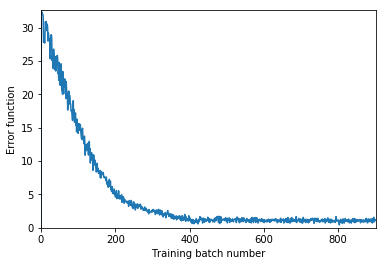

In [501]:
plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,len(cost_history),0,np.max(cost_history)])
plt.xlabel('Training batch number')
plt.ylabel('Error function')
plt.savefig('graderror.png')

In [260]:
pred_y = sess.run(tf.nn.softmax(y), feed_dict={x: features[200:205]})
print(pred_y)
print(labels[200:205])


[[8.8421559e-01 2.9960619e-02 2.2080410e-02 6.1186701e-02 2.7970478e-04
  2.2770229e-03]
 [7.5944340e-01 8.2159936e-02 5.5696912e-02 9.3678564e-02 2.3097734e-03
  6.7114788e-03]
 [4.8775798e-01 3.1349400e-01 5.7288490e-02 1.0397406e-01 2.4653805e-02
  1.2831618e-02]
 [8.0591768e-01 6.5404616e-02 3.9649379e-02 8.2931682e-02 1.2992556e-03
  4.7973907e-03]
 [7.3188591e-01 1.3038158e-01 3.6888000e-02 9.0940848e-02 3.6786655e-03
  6.2248781e-03]]
[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]]


In [359]:
type(sess.run(tf.argmax(y_,1), feed_dict={y_:labels[345:346]}))


numpy.ndarray

In [251]:
np.array(0)

array(0)